In [72]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report,\
accuracy_score,confusion_matrix,precision_score,recall_score,\
f1_score,roc_curve,ConfusionMatrixDisplay,roc_auc_score



** Data Clearning**

Handling Missing values

1. Handling Missing values
2. Handling Duplicates
3. Check data type
4. Explore the dataset

In [2]:
data=pd.read_csv("Travel.csv")
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
#check missing values

data.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [6]:
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
" check all the categories"

' check all the categories'

In [8]:
data["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [9]:
data["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [10]:
data["TypeofContact"].value_counts()

,count
TypeofContact,
Self Enquiry,3444
Company Invited,1419


In [11]:
data["Designation"].value_counts()

,count
Designation,
Executive,1842
Manager,1732
Senior Manager,742
AVP,342
VP,230


In [12]:
data["ProductPitched"].value_counts()

,count
ProductPitched,
Basic,1842
Deluxe,1732
Standard,742
Super Deluxe,342
King,230


In [13]:
data["Occupation"].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [14]:
data["ProdTaken"].value_counts()

,count
ProdTaken,
0,3968
1,920


In [15]:
data["Passport"].value_counts()

,count
Passport,
0,3466
1,1422


In [16]:
"In Gender category Female and Fe Male are same. we will replace Fe Male by Female"

'In Gender category Female and Fe Male are same. we will replace Fe Male by Female'

In [17]:
data["Gender"]=data["Gender"].replace("Fe Male","Female")

In [18]:
data["Gender"].value_counts()

,count
Gender,
Male,2916
Female,1972


In [19]:
" In Marital Status column replace single by unmarried because meaning is same"

' In Marital Status column replace single by unmarried because meaning is same'

In [20]:
data["MaritalStatus"]=data["MaritalStatus"].replace("Single","Unmarried")
data["MaritalStatus"].value_counts()

,count
MaritalStatus,
Married,2340
Unmarried,1598
Divorced,950


In [21]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [22]:
"Check Missing values and print features with nan values"

'Check Missing values and print features with nan values'

In [23]:
features_null_values=[features for features in data.columns if
                    data[features].isnull().sum()>=1]

features_null_values

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [24]:
"Find out the % missing values in each features"

'Find out the % missing values in each features'

In [25]:

for feature in features_null_values:
    print(feature,"->",np.round(data[feature].isnull().mean()*100,2),"% of Missing Values")

#for feature in features_null_values:
#print(features,np.round(data[features].innull().mean()*100,2))
#
#for feature in features_null_values:
#print(feature,np.round(data[feature],isnull().mean()*100,2))
#
#for feature in features_null_values:
#print(feature,np.round(data[feature].isnull().mean()*100,2))



Age -> 4.62 % of Missing Values
TypeofContact -> 0.51 % of Missing Values
DurationOfPitch -> 5.14 % of Missing Values
NumberOfFollowups -> 0.92 % of Missing Values
PreferredPropertyStar -> 0.53 % of Missing Values
NumberOfTrips -> 2.86 % of Missing Values
NumberOfChildrenVisiting -> 1.35 % of Missing Values
MonthlyIncome -> 4.77 % of Missing Values


In [26]:
"Check Statistics of Numerical columns which have null values"

'Check Statistics of Numerical columns which have null values'

In [27]:
data[features_null_values].select_dtypes(exclude="object").describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [28]:
data[features_null_values].select_dtypes(exclude="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4662 non-null   float64
 1   DurationOfPitch           4637 non-null   float64
 2   NumberOfFollowups         4843 non-null   float64
 3   PreferredPropertyStar     4862 non-null   float64
 4   NumberOfTrips             4748 non-null   float64
 5   NumberOfChildrenVisiting  4822 non-null   float64
 6   MonthlyIncome             4655 non-null   float64
dtypes: float64(7)
memory usage: 267.4 KB


**Imputing Null values**

1. Impute Median value for Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for NumberofFollowup as It is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute Medaian for NumberofTrips
7. Impute Mode for NumbeOfChildrenVisiting
8. Impute Median for MonthlyIncome

In [29]:

#Age Imputation

data.Age.fillna(data.Age.median(),inplace=True)

data["Age"].isnull().sum()

0

In [30]:
data.TypeofContact.mode()

,TypeofContact
0,Self Enquiry


In [31]:
#TypeofContact Imputation

data.TypeofContact.fillna(data.TypeofContact.mode()[0],inplace=True)

data["TypeofContact"].isnull().sum()

data["TypeofContact"].value_counts()

,count
TypeofContact,
Self Enquiry,3469
Company Invited,1419


In [32]:
#DurationOfPitch Imputation

data.DurationOfPitch.fillna(data.DurationOfPitch.median(),inplace=True)

data.DurationOfPitch.isnull().sum()




0

In [33]:
#NumberOfFollowups Imputation

data.NumberOfFollowups.fillna(data.NumberOfFollowups.mode()[0],inplace=True)

print(data.NumberOfFollowups.value_counts())

print(" ")

print("Null Values:-",data.NumberOfFollowups.isnull().sum())



NumberOfFollowups
4.0    2113
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64
 
Null Values:- 0


In [34]:
#PreferredPropertyStar Imputation

data.PreferredPropertyStar.fillna(data.PreferredPropertyStar.mode()[0],inplace=True)

print(data.PreferredPropertyStar.value_counts())

print(" ")

print(data.PreferredPropertyStar.isnull().sum())


PreferredPropertyStar
3.0    3019
5.0     956
4.0     913
Name: count, dtype: int64
 
0


In [35]:

#NumberOfTrips Imputation

data.NumberOfTrips.fillna(data.NumberOfTrips.median(),inplace=True)

data.NumberOfTrips.isnull().sum()


0

In [36]:
#NumberOfChildrenVisiting Imputation

data.NumberOfChildrenVisiting.fillna(data.NumberOfChildrenVisiting.mode()[0],inplace=True)

print(data.NumberOfChildrenVisiting.value_counts())

print(" ")

print("Null Values:-",data.NumberOfChildrenVisiting.isnull().sum())


NumberOfChildrenVisiting
1.0    2146
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64
 
Null Values:- 0


In [37]:
#MonthlyIncome Imputation

data.MonthlyIncome.fillna(data.MonthlyIncome.median(),inplace=True)

data.MonthlyIncome.isnull().sum()




0

In [38]:
print("Information about data:-")
print(" ")

print(data.info())

#all null values are now filled.

print("------------------------------------------------------- ")

print("Total Null Value:-")

print(" ")

print(data.isnull().sum())

Information about data:-
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4888 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4888 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4888 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4888 non-n

In [39]:
#drop customerID as it is not important for analysis

data.drop("CustomerID",inplace=True,axis=1)



In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

**Feature Engineering**

Feature Extraction

In [41]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [42]:
"Create a new column for feature.\
NumberofPersonVisiting and NUmberOfChildren shows same kind of \
data.A new feaure can be added combining these 2 features"


'Create a new column for feature.NumberofPersonVisiting and NUmberOfChildren shows same kind of data.A new feaure can be added combining these 2 features'

In [43]:
data["TotalVisiting"]=data["NumberOfPersonVisiting"] + \
                    data["NumberOfChildrenVisiting"]

data.drop(columns=["NumberOfPersonVisiting",\
                  "NumberOfChildrenVisiting"]\
          ,inplace=True,axis=1)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [45]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [46]:
#Get all Numerical features

numerical_features=[feature for feature in data.columns if data[feature].dtype !="object"]

print("Number of Numerical feature ->",len(numerical_features))

print(" ")

print("Numerical feature :-")

print(numerical_features)


Number of Numerical feature -> 12
 
Numerical feature :-
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [47]:
#Get all Categorical features

categorical_features=[feature for feature in data.columns if data[feature].dtype=="object"]

print("Number of Categorical feature ->",len(categorical_features))

print(" ")

print("Cateforical feature :-")

print(categorical_features)


Number of Categorical feature -> 6
 
Cateforical feature :-
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [48]:
#Get all Discrete features

discrete_features=[feature for feature in numerical_features if\
                   len(data[feature].unique())<=25]

print("Number of Discrete features ->",len(discrete_features))

print(" ")

print("Discrete features :-")

print(discrete_features)


Number of Discrete features -> 9
 
Discrete features :-
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisiting']


In [49]:
#Get all Continuos features

continuos_features=[feature for feature in numerical_features
                    if feature not in discrete_features]

print("Number of Continuos features ->",len(continuos_features))

print(" ")

print("Continuos features :-")

print(continuos_features)


Number of Continuos features -> 3
 
Continuos features :-
['Age', 'DurationOfPitch', 'MonthlyIncome']


**Model training**

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [51]:

X=data.drop(["ProdTaken"],axis=1)
y=data["ProdTaken"]



In [52]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [53]:
print("Target Varible:- ")
y.value_counts()

Target Varible:- 


,count
ProdTaken,
0,3968
1,920


In [54]:
#separate data into tran and test

X_train,X_test,y_train,y_test=train_test_split(X,y,
                    test_size=0.2,random_state=10)


In [55]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [56]:
y_train.shape,y_test.shape

((3910,), (978,))

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [58]:
#What is the use of a column transformer?
#It allows us to create and apply different transformations
#to specific columns of our data. To use Column Transformer,
#we need to provide a transformer object and
#specify the transformations we want to apply to each column.
#These transformations are passed in a tuple along with the
#column we want to apply them to.

In [59]:
#Seperate Categorical and Numerical features


cat_features=X.select_dtypes(include="object").columns
print(cat_features)

print(" ")

num_features=X.select_dtypes(exclude="object").columns
print(num_features)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
 
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')


In [60]:
#Apply Column transformer

num_transformer=StandardScaler()

onehot_transformer=OneHotEncoder(drop="first")

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",onehot_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [61]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [62]:
#Why do we use drop first in one-hot encoding?
#Number of columns created by one-hot encoding one colunmn is not
#require. Suppose there are n columne then n-1 column will try
#to represent the entire data.

In [63]:
#applying transformation in training(fit_trasform)
X_train=preprocessor.fit_transform(X_train)

In [64]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711953,-0.782625,-0.713603,0.530883,0.434216,-0.644305,0.678514,0.784667,-0.226963,-1.496955
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.711953,0.664499,0.293685,-0.727912,-0.681646,-0.644305,-1.518275,0.784667,0.369702,-0.080598
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711953,-0.782625,0.293685,0.530883,-0.681646,-0.644305,1.410777,0.784667,-0.265800,0.627580
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.711953,-1.023812,-1.720892,-0.727912,-0.681646,-0.644305,-0.053749,0.784667,0.010892,2.043937
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.711953,0.302718,1.300974,1.789679,0.434216,1.552061,1.410777,0.784667,0.973903,2.043937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,-0.300250,-0.713603,0.530883,-0.123715,-0.644305,-1.518275,-1.274426,-1.257601,0.627580
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,1.026280,0.293685,-0.727912,-0.123715,1.552061,1.410777,0.784667,-0.473319,-0.080598
3907,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.711953,-0.300250,-0.713603,1.789679,1.550078,1.552061,-0.053749,-1.274426,-0.226963,-0.788777
3908,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,0.061531,1.300974,1.789679,-0.681646,1.552061,-0.053749,-1.274426,-0.487424,0.627580


In [65]:
#apply transformation on test(tranform)
X_test=preprocessor.transform(X_test)

In [66]:
#What's the difference between fit_transform and transform?
#The fit() method helps in fitting the data into a model,
#transform() method helps in transforming the data into a
#form that is more suitable for the model. Fit_transform() method,
#on the other hand, combines the functionalities of both fit()
#and transform() methods in one step.

In [67]:
#create a dictionary of models.
#multiple classifier added using this method.

models={
    "Random Forest":RandomForestClassifier()
}

for i in range(len(list(models))): #converting in list so that it can iterate through each items.

    model=list(models.values())[i]
    #from dictionary of models only get value i.e classifier

    model.fit(X_train,y_train)
    #train the model

    #make predictions on train and test data
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Performance of training data
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #Performance of testing data
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.values())[i])

    print("Model performance for Training dataset :-")

    print("-->Accuracy: {:.4f}".format(model_train_accuracy))
    print("-->F1 Score: {:.4f}".format(model_train_f1))
    print("-->Precision: {:.4f}".format(model_train_precision))
    print("-->Recall: {:.4f}".format(model_train_recall))
    print("-->ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("- - - - - - - - - - - - - - - - - - - - ")

    print("Model performance for Test dataset :-")

    print("-->Accuracy: {:.4f}".format(model_test_accuracy))
    print("-->F1 Score: {:.4f}".format(model_test_f1))
    print("-->Precision: {:.4f}".format(model_test_precision))
    print("-->Recall: {:.4f}".format(model_test_recall))
    print("-->ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print("="*35)
    print("\n")


RandomForestClassifier()
Model performance for Training dataset :-
-->Accuracy: 1.0000
-->F1 Score: 1.0000
-->Precision: 1.0000
-->Recall: 1.0000
-->ROC AUC Score: 1.0000
- - - - - - - - - - - - - - - - - - - - 
Model performance for Test dataset :-
-->Accuracy: 0.9356
-->F1 Score: 0.7692
-->Precision: 0.9375
-->Recall: 0.6522
-->ROC AUC Score: 0.8218




**Hyper Parameter Tuning**

In [68]:
#define hyper parameter

rf_params={
        "max_depth": [5,8,15,None,10],
        "max_features":[5,7,"auto",8],
        "min_samples_split":[2,8,15,20],
        "n_estimators":[100,200,500,1000,5000,10000]
        }
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000, 5000, 10000]}

In [69]:
# Modesl list for parameter tuning

randomcv_models=[
                ("RF",RandomForestClassifier(),rf_params)
]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000, 5000, 10000]})]

In [70]:
#Apply parameter tuning

model_param={}

for name,model,params in randomcv_models:

    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1
                              )

    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"~ ~ ~ ~ ~ ~ ~ ~ Best Params for {model_name}~ ~ ~ ~ ~ ~ ~ ~")
    print(model_param[model_name])








Fitting 3 folds for each of 100 candidates, totalling 300 fits
~ ~ ~ ~ ~ ~ ~ ~ Best Params for RF~ ~ ~ ~ ~ ~ ~ ~
{'n_estimators': 5000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [71]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split=2, max_features=7, max_depth= None)
}

for i in range(len(list(models))): #converting in list so that it can iterate through each items.

    model=list(models.values())[i]
    #from dictionary of models only get value i.e classifier

    model.fit(X_train,y_train)
    #train the model

    #make predictions on train and test data
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Performance of training data
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    #Performance of testing data
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.values())[i])

    print("Model performance for Training dataset :-")

    print("-->Accuracy: {:.4f}".format(model_train_accuracy))
    print("-->F1 Score: {:.4f}".format(model_train_f1))
    print("-->Precision: {:.4f}".format(model_train_precision))
    print("-->Recall: {:.4f}".format(model_train_recall))
    print("-->ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print("- - - - - - - - - - - - - - - - - - - - ")

    print("Model performance for Test dataset :-")

    print("-->Accuracy: {:.4f}".format(model_test_accuracy))
    print("-->F1 Score: {:.4f}".format(model_test_f1))
    print("-->Precision: {:.4f}".format(model_test_precision))
    print("-->Recall: {:.4f}".format(model_test_recall))
    print("-->ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print("="*35)
    print("\n")


RandomForestClassifier(max_features=7, n_estimators=1000)
Model performance for Training dataset :-
-->Accuracy: 1.0000
-->F1 Score: 1.0000
-->Precision: 1.0000
-->Recall: 1.0000
-->ROC AUC Score: 1.0000
- - - - - - - - - - - - - - - - - - - - 
Model performance for Test dataset :-
-->Accuracy: 0.9427
-->F1 Score: 0.8000
-->Precision: 0.9412
-->Recall: 0.6957
-->ROC AUC Score: 0.8435




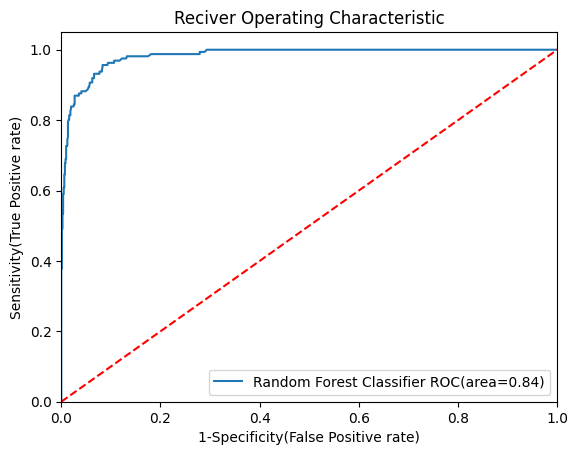

In [75]:
#plot ROC AUC curve

plt.figure()

#Add the model to the list that you want to view on the ROC plot

auc_models=[
    {
        "label": "Random Forest Classifier",
        "model": RandomForestClassifier(n_estimators= 1000,
        min_samples_split=2, max_features=7, max_depth= None),
        "auc": 0.8435
    }
]

#create a for loop through all model

for algo in auc_models:

    model=algo["model"] #select the model
    model.fit(X_train,y_train)#train the model

#compute the False positive rate and True positive rate
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])

#calculate area under the curve to display on the plot

    plt.plot(fpr,tpr,label="%s ROC(area=%0.2f)" %(algo['label'],\
             algo['auc']))
    #plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' %
     #(algo['label'], algo['auc']))

#custome settings for the plot

plt.plot([0,1],[0,1],"r--")

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel("1-Specificity(False Positive rate)")
plt.ylabel("Sensitivity(True Positive rate)")

plt.title("Reciver Operating Characteristic")
plt.legend(loc="lower right")

plt.show()




